In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
cd /content/drive/MyDrive/Model

/content/drive/MyDrive/Model


In [ ]:
ls

drive/  sample_data/


In [ ]:
import os
import re
from scipy import ndimage, misc
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.13.0


In [ ]:
import os
import shutil
from tqdm import tqdm
import time

# Paths to the real and altered image folders
real_image_folder = '/content/drive/MyDrive/SOCOFing/SOCOFing/Real'
altered_image_folder_Easy = '/content/drive/MyDrive/SOCOFing/SOCOFing/Altered/Altered-Easy'
altered_image_folder_Hard = '/content/drive/MyDrive/SOCOFing/SOCOFing/Altered/Altered-Hard'
altered_image_folder_Medium = '/content/drive/MyDrive/SOCOFing/SOCOFing/Altered/Altered-Medium'

# HR and LR folders
hr_folder = '/content/drive/MyDrive/HR_A'  # Folder to store HR images
lr_folder = '/content/drive/MyDrive/LR_A'  # Folder to store LR images

# Create the HR and LR folders if they don't exist
os.makedirs(hr_folder, exist_ok=True)
os.makedirs(lr_folder, exist_ok=True)
count=0

# Get the list of files in the folder
file_list = os.listdir(real_image_folder)
file_list=file_list[:3000]
# Iterate through the real image folder
for real_filename in tqdm(file_list, desc="Processing", unit="item"):
    #print(real_filename)
    if real_filename.endswith(".BMP"):
        real_image_path = os.path.join(real_image_folder, real_filename)

        # Extract the common part of the filename (e.g., "1__M_Left_index_finger")
        common_filename = real_filename.split(".")[0]

        # Generate the filenames for CR, Obl, and Zcut alterations
        cr_filename = common_filename + "_CR.BMP"
        obl_filename = common_filename + "_Obl.BMP"
        zcut_filename = common_filename + "_Zcut.BMP"



        # Check if the corresponding altered images exist and move them to the LR folder
        if os.path.exists(os.path.join(altered_image_folder_Easy, cr_filename)):
            altered_easy_image_path=os.path.join(altered_image_folder_Easy, cr_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_CR_Easy.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_easy_image_path, os.path.join(lr_folder, common_filename+"_CR_Easy.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Easy, obl_filename)):
            altered_easy_image_path=os.path.join(altered_image_folder_Easy, obl_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Obl_Easy.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_easy_image_path, os.path.join(lr_folder, common_filename+"_Obl_Easy.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Easy, zcut_filename)):
            altered_easy_image_path=os.path.join(altered_image_folder_Easy, zcut_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Zcut_Easy.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_easy_image_path, os.path.join(lr_folder, common_filename+"_Zcut_Easy.BMP"))


        if os.path.exists(os.path.join(altered_image_folder_Hard, cr_filename)):
            altered_hard_image_path=os.path.join(altered_image_folder_Hard, cr_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_CR_Hard.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_hard_image_path, os.path.join(lr_folder, common_filename+"_CR_Hard.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Hard, obl_filename)):
            altered_hard_image_path=os.path.join(altered_image_folder_Hard, obl_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Obl_Hard.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_hard_image_path, os.path.join(lr_folder,common_filename+"_Obl_Hard.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Hard, zcut_filename)):
            altered_hard_image_path=os.path.join(altered_image_folder_Hard, zcut_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Zcut_Hard.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_hard_image_path, os.path.join(lr_folder, common_filename+"_Zcut_Hard.BMP"))

        if os.path.exists(os.path.join(altered_image_folder_Medium, cr_filename)):
            altered_medium_image_path=os.path.join(altered_image_folder_Medium, cr_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_CR_Medium.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_medium_image_path, os.path.join(lr_folder, common_filename+"_CR_Medium.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Medium, obl_filename)):
            altered_medium_image_path=os.path.join(altered_image_folder_Medium, obl_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Obl_Medium.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_medium_image_path, os.path.join(lr_folder, common_filename+"_Obl_Medium.BMP"))
        if os.path.exists(os.path.join(altered_image_folder_Medium, zcut_filename)):
            altered_medium_image_path=os.path.join(altered_image_folder_Medium, zcut_filename)
            hr_destination_path = os.path.join(hr_folder, common_filename + "_Real_Zcut_Medium.BMP")
            shutil.copy(real_image_path, hr_destination_path)
            shutil.copy(altered_medium_image_path, os.path.join(lr_folder, common_filename+"_Zcut_Medium.BMP"))

        time.sleep(0.1)
print("Data organization complete.")


Processing: 100%|██████████| 3000/3000 [5:12:42<00:00,  6.25s/item]

Data organization complete.


In [ ]:
hr_folder = '/content/drive/MyDrive/LR'
image_count=0
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
for filename in os.listdir(hr_folder):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_count += 1

print(f"Number of images in the folder: {image_count}")

Number of images in the folder: 41778


In [ ]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [ ]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/drive/MyDrive/ColabNotebooks/DB_images'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 11450/11450 [02:01<00:00, 93.85it/s] 


In [ ]:
del files

In [ ]:
import numpy as np

# Assuming high_img is a list of numpy arrays
high_img_array = np.array(high_img)

# Define the path where you want to save the data in Google Drive
save_path = '/content/drive/MyDrive/Model/high_img_randomData.npy'

# Save the data
np.save(save_path, high_img_array)

In [ ]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/drive/MyDrive/ColabNotebooks/DB_images'
output_dir='/content/drive/MyDrive/ColabNotebooks/DB_images_LR'

low_img=[]


scale_factor = 0.2

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    input_image = Image.open(os.path.join(input_dir, filename))
    new_size = (int(input_image.size[0] * scale_factor), int(input_image.size[1] * scale_factor))
    output_image = input_image.resize(new_size, resample=Image.LANCZOS)
    # Save the output image to the output directory
    output_image.save(os.path.join(output_dir, filename))


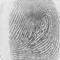

In [ ]:
output_image

In [ ]:
cd /content/drive/MyDrive/Model

/content/drive/MyDrive/Model


In [ ]:
ls -l

total 19024131
-rw------- 1 root root 19415433344 Sep 29 22:27 high_img.npy
-rw------- 1 root root    15393880 Sep 19 03:31 model_siamese_net1_r_github.h5
-rw------- 1 root root    15393880 Sep 22 06:09 model_siamese_net1_r_githubNew.h5
-rw------- 1 root root      278576 Sep 20 22:44 SRCNN_Socofing.h5
-rw------- 1 root root     8552096 Sep 11 22:31 SRGANmodel148.h5
-rw------- 1 root root     8552096 Sep 11 22:31 SRGANmodel149.h5
-rw------- 1 root root     8551896 Sep 11 20:01 SRGANmodel.h5
-rw------- 1 root root     8551752 Sep 24 18:18 SRGAN_socofing.h5


In [ ]:
cp '/content/drive/MyDrive/Model/high_img.npy' '/content/drive/MyDrive/Celebs/high_img.npy'

In [ ]:
del high_img

In [ ]:
del high_img_array

In [ ]:
import h5py
import numpy as np

# Specify the path to the HDF5 file where the image data is stored
hdf5_file_path = 'image_data.h5'

# Open the HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # Load the image data from the HDF5 file
    high_img_array = hdf5_file['high_img'][:]

# Now, you have the image data loaded into the 'high_img_array' variable
# You can work with the image data as needed

# Example: Display the shape of the loaded image data
print("Shape of loaded image data:", high_img_array.shape)


In [ ]:
high_img

[array([[[0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.627451  , 0.627451  , 0.627451  ],
         [0.62352943, 0.62352943, 0.62352943],
         [0.6156863 , 0.6156863 , 0.6156863 ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.627451  , 0.627451  , 0.627451  ],
         [0.61960787, 0.61960787, 0.61960787],
         [0.5803922 , 0.5803922 , 0.5803922 ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [ ]:

SIZE = 256
low_img = []
path = '/content/drive/MyDrive/ColabNotebooks/DB_images_LR'
files = os.listdir(path)
files = sorted_alphanumeric(files[:15000])
if not os.path.exists(path):
    print(f"Error: Directory '{path}' does not exist.")
else:
    for i in tqdm(files):
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 11450/11450 [00:36<00:00, 314.11it/s]


In [ ]:
import numpy as np

# Assuming high_img is a list of numpy arrays
low_img_array = np.array(low_img)

# Define the path where you want to save the data in Google Drive
save_path = '/content/drive/MyDrive/Model/low_img_randomData.npy'

# Save the data
np.save(save_path, low_img_array)

In [ ]:
import numpy as np

# Assuming high_img is a list of numpy arrays
low_img_array = np.array(low_img)

# Define the path where you want to save the data in Google Drive
save_path = '/content/drive/MyDrive/Model/low_img_15K.npy'

# Save the data
np.save(save_path, low_img_array)

In [ ]:
del low_img_array

In [ ]:
del low_img

In [ ]:
import numpy as np
high_img = np.load('/content/drive/MyDrive/Model/high_img_randomData.npy')
low_img = np.load('/content/drive/MyDrive/Model/low_img_randomData.npy')

In [ ]:
!cat /proc/meminfo

MemTotal:       53474512 kB
MemFree:          632220 kB
MemAvailable:   12615836 kB
Buffers:           45652 kB
Cached:         12255180 kB
SwapCached:            0 kB
Active:           438108 kB
Inactive:       51579016 kB
Active(anon):       1472 kB
Inactive(anon): 39716808 kB
Active(file):     436636 kB
Inactive(file): 11862208 kB
Unevictable:          12 kB
Mlocked:              12 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               368 kB
Writeback:             0 kB
AnonPages:      39716520 kB
Mapped:           321436 kB
Shmem:              1984 kB
KReclaimable:     313532 kB
Slab:             388388 kB
SReclaimable:     313532 kB
SUnreclaim:        74856 kB
KernelStack:        7728 kB
PageTables:       104952 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    26737256 kB
Committed_AS:   42522152 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       75556 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
high_img_10=high_img_10[:5000]
low_img_10=low_img_10[:5000]

In [ ]:
import gc

gc.collect()


0

In [ ]:
del high_img

In [ ]:
high_img_array = np.array(high_img_10)
low_img_array = np.array(low_img_10)

# Define the path where you want to save the data in Google Drive
save_path_h = '/content/drive/MyDrive/Model/high_img_5K.npy'
save_path_l = '/content/drive/MyDrive/Model/low_img_5K.npy'

# Save the data
np.save(save_path_h, high_img_array)
np.save(save_path_l, low_img_array)

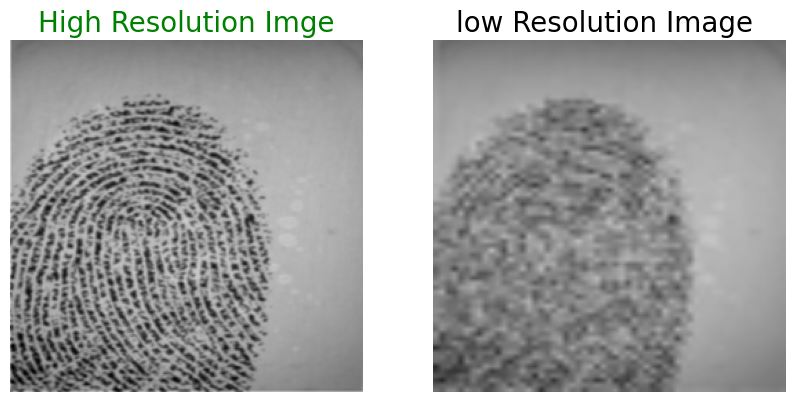

In [ ]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [ ]:
SIZE = 256

In [ ]:

train_high_image = high_img[:9000]
train_low_image = low_img[:9000]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[9000:10500]
validation_low_image =  low_img[9000:10500]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[10500:]
test_low_image = low_img[10500:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (9000, 256, 256, 3)
Shape of test images: (950, 256, 256, 3)
Shape of validation images: (1500, 256, 256, 3)


In [ ]:
import numpy as np

# Assuming high_img is a list of numpy arrays
test_low_image_array = np.array(test_low_image)

# Define the path where you want to save the data in Google Drive
save_path = '/content/drive/MyDrive/Model/test_low_image_rand.npy'

# Save the data
np.save(save_path,test_low_image_array)

In [ ]:
del high_img
del low_img

In [ ]:
high_img=[]
low_img=[]

In [ ]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       2403      
                                                                 
Total params: 20099 (78.51 KB)
Trainable params: 20099 (78.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


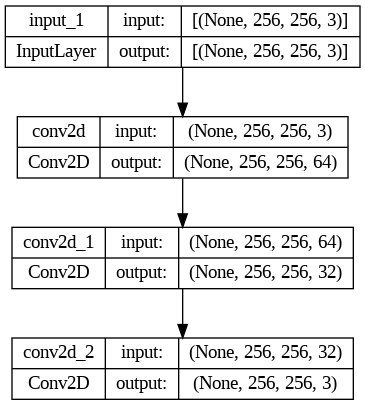

In [ ]:
from keras import layers

input_img=Input(shape=(256,256,3))
l1=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input_img)
l2=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (l1)
l3=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (l2)


SRCNN=Model(input_img,l3)


def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
SRCNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=pixel_mse_loss, metrics=[PSNR,'accuracy'])
SRCNN.summary()
plot_model(SRCNN, to_file ='super_res.png',show_shapes=True)

In [ ]:
import numpy as np

# Assuming high_img is a list of numpy arrays
train_high_image_array = np.array(train_high_image)

# Define the path where you want to save the data in Google Drive
save_path = '/content/drive/MyDrive/Model/train_high_image_rdm.npy'

# Save the data
np.save(save_path, train_high_image_array)

In [ ]:
import numpy as np
high_image = np.load('/content/drive/MyDrive/Model/high_img.npy')
low_image = np.load('/content/drive/MyDrive/Model/low_img.npy')

In [ ]:
len(high_image)

24688

In [ ]:
import numpy as np
train_high_image = np.load('/content/drive/MyDrive/Model/train_high_image_15K.npy')
train_low_image = np.load('/content/drive/MyDrive/Model/train_low_image_15K.npy')
validation_high_image = np.load('/content/drive/MyDrive/Model/validation_high_image_15K.npy')
validation_low_image = np.load('/content/drive/MyDrive/Model/validation_low_image_15K.npy')

In [ ]:
import numpy as np
def data_generator(low_paths, high_paths, batch_size):
    num_samples = len(low_paths)
    print(low_paths)
    while True:
        for i in range(0, num_samples, batch_size):
            batch_low = []
            batch_high = []
            for j in range(i, min(i + batch_size, num_samples)):
                low_image = np.load(low_paths[j])
                high_image = np.load(high_paths[j])
                # Preprocess the data here as needed
                batch_low.append(low_image)
                batch_high.append(high_image)
            yield np.array(batch_low), np.array(batch_high)

train_high_image_paths = np.load('/content/drive/MyDrive/Model/train_high_image_rand.npy')
train_low_image_paths = np.load('/content/drive/MyDrive/Model/train_low_image_rand.npy')
validation_high_image_paths = np.load('/content/drive/MyDrive/Model/validation_high_image_rand.npy')
validation_low_image_paths = np.load('/content/drive/MyDrive/Model/validation_low_image_rand.npy')

# Create data generators
train_generator = data_generator(train_low_image_paths, train_high_image_paths, batch_size=1)
validation_generator = data_generator(validation_low_image_paths, validation_high_image_paths, batch_size=1)

# Use generators in model.fit
# Use len(train_low_image_paths) and len(validation_low_image_paths) for steps_per_epoch and validation_steps
SRCNN.fit(train_generator, epochs=100, steps_per_epoch=len(train_low_image_paths), validation_data=validation_generator, validation_steps=len(validation_low_image_paths))


[[[[0.44705883 0.44705883 0.44705883]
   [0.44705883 0.44705883 0.44705883]
   [0.44313726 0.44313726 0.44313726]
   ...
   [0.38039216 0.38039216 0.38039216]
   [0.38039216 0.38039216 0.38039216]
   [0.38039216 0.38039216 0.38039216]]

  [[0.44705883 0.44705883 0.44705883]
   [0.44705883 0.44705883 0.44705883]
   [0.44313726 0.44313726 0.44313726]
   ...
   [0.38039216 0.38039216 0.38039216]
   [0.38039216 0.38039216 0.38039216]
   [0.38039216 0.38039216 0.38039216]]

  [[0.44705883 0.44705883 0.44705883]
   [0.44705883 0.44705883 0.44705883]
   [0.44313726 0.44313726 0.44313726]
   ...
   [0.38431373 0.38431373 0.38431373]
   [0.38431373 0.38431373 0.38431373]
   [0.38431373 0.38431373 0.38431373]]

  ...

  [[0.6039216  0.6039216  0.6039216 ]
   [0.6039216  0.6039216  0.6039216 ]
   [0.6        0.6        0.6       ]
   ...
   [0.49803922 0.49803922 0.49803922]
   [0.49803922 0.49803922 0.49803922]
   [0.49803922 0.49803922 0.49803922]]

  [[0.6117647  0.6117647  0.6117647 ]
   [0.6

TypeError: ignored

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint




# Define a custom data generator
def data_generator(low_images, high_images, batch_size):
    num_samples = len(low_images)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = low_images[batch_indices]
            y_batch = high_images[batch_indices]
            yield x_batch, y_batch

# Load your data
train_low_images = np.load('/content/drive/MyDrive/Model/train_high_image_rand.npy')
train_high_images = np.load('/content/drive/MyDrive/Model/train_low_image_rand.npy')
validation_high_images = np.load('/content/drive/MyDrive/Model/validation_high_image_rand.npy')
validation_low_images = np.load('/content/drive/MyDrive/Model/validation_low_image_rand.npy')

# Set batch size and epochs
batch_size = 1
epochs = 100

# Create a data generator instance
train_data_generator = data_generator(train_low_images, train_high_images, batch_size)
val_data_generator = data_generator(validation_low_images, validation_high_images, batch_size)



# Train the model using fit_generator with validation data
history = SRCNN.fit_generator(train_data_generator, steps_per_epoch=len(train_low_images) // batch_size,
                              epochs=100,
                              validation_data=val_data_generator,
                              validation_steps=len(validation_low_images) // batch_size)

# Save the trained model
SRCNN.save('srcnn_model.h5')




<ipython-input-6-cea6dd46f58d>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = SRCNN.fit_generator(train_data_generator, steps_per_epoch=len(train_low_images) // batch_size,


Epoch 1/100
9000/9000 [==============================] - 90s 8ms/step - loss: 0.0112 - PSNR: 32.4376 - accuracy: 0.3295 - val_loss: 0.0042 - val_PSNR: 24.3330 - val_accuracy: 0.0803
Epoch 2/100
9000/9000 [==============================] - 67s 7ms/step - loss: 4.2502e-04 - PSNR: 34.9390 - accuracy: 0.3411 - val_loss: 0.0042 - val_PSNR: 24.2358 - val_accuracy: 0.8967
Epoch 3/100
9000/9000 [==============================] - 66s 7ms/step - loss: 4.0156e-04 - PSNR: 35.1853 - accuracy: 0.3329 - val_loss: 0.0041 - val_PSNR: 24.4087 - val_accuracy: 0.6199
Epoch 4/100
9000/9000 [==============================] - 66s 7ms/step - loss: 3.9468e-04 - PSNR: 35.3127 - accuracy: 0.3254 - val_loss: 0.0042 - val_PSNR: 24.2963 - val_accuracy: 0.3868
Epoch 5/100
9000/9000 [==============================] - 66s 7ms/step - loss: 3.7990e-04 - PSNR: 35.4277 - accuracy: 0.3093 - val_loss: 0.0041 - val_PSNR: 24.3591 - val_accuracy: 0.1025
Epoch 6/100
9000/9000 [==============================] - 66s 7ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [ ]:
def plot_images_and_save(high, low, predicted, save_path):
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.title('High Image', color='green', fontsize=20)
    plt.imshow(high)
    plt.subplot(1, 3, 2)
    plt.title('Low Image', color='black', fontsize=20)
    plt.imshow(low)
    plt.subplot(1, 3, 3)
    plt.title('Predicted Image', color='Red', fontsize=20)
    plt.imshow(predicted)

    plt.savefig(save_path)  # Save the figure
    plt.close()  # Close the figure to release memory

In [ ]:

from keras.models import load_model

loaded_model = load_model('/content/srcnn_model.h5',custom_objects= {'pixel_mse_loss': pixel_MSE, 'PSNR':PSNR})

In [ ]:
test_high_image_paths = np.load('/content/drive/MyDrive/Model/test_high_image_15K.npy')
test_low_image_paths = np.load('/content/drive/MyDrive/Model/test_low_image_15K.npy')

In [ ]:
test_high_image=test_high_image_paths
test_low_image=test_low_image_paths

In [ ]:
from termcolor import colored
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

font_size = 50
# Define a directory to save the images
save_directory = '/content/sample_data'

font_size = 50
for i, low_image in enumerate(test_low_image[0:15]):

    predicted = np.clip(loaded_model.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR',PSNR(test_high_image[i],predicted),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))

NameError: ignored

In [ ]:
altered_image_folder

'/content/drive/MyDrive/SOCOFing/SOCOFing/Altered/Altered-Easy'

In [ ]:
from skimage.metrics import structural_similarity as ssim
def evaluate_similarity(original_images, resized_images):
    original_gray = cv2.cvtColor(original_images, cv2.COLOR_BGR2GRAY)
    resized_gray = cv2.cvtColor(resized_images, cv2.COLOR_BGR2GRAY)
    similarity = ssim(original_gray, resized_gray)
    return similarity

In [ ]:
PSNR_values=[]
Similarities=[]
for i in range(0,27):
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    #plot_images(test_high_image[i],test_low_image[i],predicted)

    #print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))
    PSNR_values.append(PSNR(test_high_image[i],predicted).numpy())
    Similarities.append(evaluate_similarity(test_high_image[i], predicted))

avg_psnr= np.mean(PSNR_values)
avg_ssim=np.mean(Similarities)
print(f"Average PSNR {avg_psnr}")
print(f"Average SSIM:{avg_ssim}")

1/1 [==============================] - 0s 26ms/step
Average PSNR 20.99266815185547
Average SSIM:0.7635891477912623
